In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
pd.options.display.float_format = '{:.4f}'.format

In [3]:
kickstarter = pd.read_csv(r'C:\Users\Yael Aguilar\Documents\ks-projects-201801.csv')
kickstarter.shape

(378661, 15)

In [4]:
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [5]:
kickstarter.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [6]:
kickstarter = kickstarter[kickstarter.state.isin(['failed', 'successful'])]
kickstarter.state.value_counts(normalize=True)

failed       0.5961
successful   0.4039
Name: state, dtype: float64

In [7]:
kickstarter.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [8]:
pd.crosstab(kickstarter.main_category, kickstarter.state)

state,failed,successful
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


In [9]:
category_crosstab = pd.crosstab(kickstarter.main_category, kickstarter.state)

In [10]:
category_crosstab['success rate'] = category_crosstab.successful / (category_crosstab.successful + category_crosstab.failed)

In [11]:
category_crosstab

state,failed,successful,success rate
main_category,,,
Art,14131,11510,0.4489
Comics,4036,5842,0.5914
Crafts,5703,2115,0.2705
Dance,1235,2338,0.6544
Design,14814,10550,0.4159
Fashion,14182,5593,0.2828
Film & Video,32904,23623,0.4179
Food,15969,6085,0.2759
Games,16003,12518,0.4389


In [12]:
kickstarter.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [13]:
currency_crosstab = pd.crosstab(kickstarter.currency, kickstarter.state)
currency_crosstab['success_rate'] = currency_crosstab.successful / (currency_crosstab.successful+currency_crosstab.failed)
currency_crosstab

state,failed,successful,success_rate
currency,,,
AUD,4610,2011,0.3037
CAD,8238,4137,0.3343
CHF,465,187,0.2868
DKK,567,362,0.3897
EUR,10496,3882,0.2700
GBP,17395,12081,0.4099
HKD,261,216,0.4528
JPY,16,7,0.3043
MXN,1015,396,0.2807


In [14]:
kickstarter['launch']  = pd.to_datetime(kickstarter.launched)
kickstarter['dead'] = pd.to_datetime(kickstarter.deadline)
kickstarter['duration'] = (kickstarter.dead - kickstarter.launch).dt.days

<AxesSubplot:>

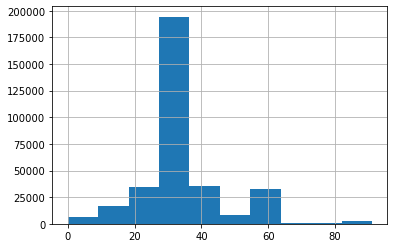

In [15]:
kickstarter.duration.hist()

array([<AxesSubplot:title={'center':'failed'}>,
       <AxesSubplot:title={'center':'successful'}>], dtype=object)

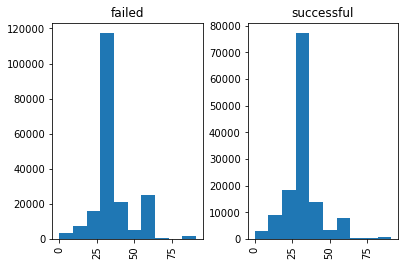

In [16]:
kickstarter.duration.hist(by=kickstarter.state)

In [17]:
kickstarter.drop(columns=['usd_goal_real', 'usd pledged', 'usd_pledged_real'], inplace =True)

In [18]:
kickstarter.isnull().sum(axis=0)

ID               0
name             3
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
launch           0
dead             0
duration         0
dtype: int64

In [19]:
kickstarter = kickstarter.dropna()

In [20]:
kickstarter.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
launch           0
dead             0
duration         0
dtype: int64

In [21]:
kickstarter_variables = kickstarter[['goal', 'main_category', 'duration', 'currency','backers']]
#kickstarter_y = pd.get_dummies(data=kickstarter.state, drop_first=True)
kickstarter_y = kickstarter.state

In [22]:
kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns = ['main_category', 'currency'], drop_first=True)
kickstarter_x.head()    

,goal,duration,backers,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0000,58,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0000,59,15,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0000,44,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0000,29,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0000,34,224,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
x = kickstarter_x[:1]
kickstarter[:1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,launch,dead,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,2015-08-11 12:12:28,2015-10-09,58


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(kickstarter_x, kickstarter_y, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression

ks_model = LogisticRegression().fit(x_train, y_train)

C:\Users\Yael Aguilar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import confusion_matrix

y_pred = ks_model.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[37822,  1744],
       [ 5581, 21188]], dtype=int64)

In [28]:
ks_model.predict(x)

array(['failed'], dtype=object)

In [85]:
from sklearn import metrics 

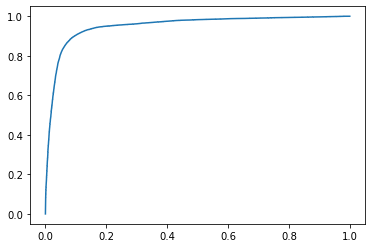

In [93]:
y_pred = ks_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)

In [115]:
auc

0.9506716077474016

array([0], dtype=uint8)

In [119]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(x_train, y_train)


<ipython-input-119-325db4367353>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ks_rf = RandomForestClassifier().fit(x_train, y_train)


In [121]:
y_pred = ks_rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[36787,  2515],
       [ 2494, 24539]], dtype=int64)

In [ ]:
y_